# internal tide, twin experiments

Relevant for idealized simulations for now

In [1]:
import xarray as xr

from matplotlib import pyplot as plt
%matplotlib inline

import crocosi.postp as pp

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/utils.py:137: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster()
#w = cluster.scale(28*1)
#
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:41132 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 56 Memory: 107.37 GB


---

## single run

In [3]:
#root_path = '/home/c11-data/Test_aponte/jetn/'
root_path = '/home1/scratch/aponte/'

nmode = 1

runs = [root_path+'jet_wp5_ptb_m%d_p%d'%(nmode, i) for i in range(5)]
R = []
for run in runs:
    _r = pp.Run(run, open_nc=['surf'])
    _r['surf'] = _r['surf'].rename({'time_instant': 'time'})
    R.append(_r)
R

#run = 'jet_cfg1_wp75_4km_0a1500j'
#r = pp.Run(root_path+run, prefix='file_', open_nc=['ave'], verbose=True)

#run = 'jet_cfg1_wp75_4km_1500a2000j_itide'
#r = pp.Run(root_path+run, open_nc=['ave'], verbose=True)

[Run: /home1/scratch/aponte/jet_wp5_ptb_m1_p0
   datasets suffixes: grid / surf,
 Run: /home1/scratch/aponte/jet_wp5_ptb_m1_p1
   datasets suffixes: grid / surf,
 Run: /home1/scratch/aponte/jet_wp5_ptb_m1_p2
   datasets suffixes: grid / surf,
 Run: /home1/scratch/aponte/jet_wp5_ptb_m1_p3
   datasets suffixes: grid / surf,
 Run: /home1/scratch/aponte/jet_wp5_ptb_m1_p4
   datasets suffixes: grid / surf]

In [4]:
R[0]['surf']

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time: 14094, x_rho: 258, x_u: 257, y_rho: 722, y_v: 721)
Coordinates:
  * y_v                  (y_v) float32 0.0 4000.0 8000.0 ... 2876000.0 2880000.0
    x_v                  (x_rho) float32 dask.array<chunksize=(258,), meta=np.ndarray>
    y_u                  (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
  * x_rho                (x_rho) float32 -2000.0 2000.0 ... 1022000.0 1026000.0
  * y_rho                (y_rho) float32 -2000.0 2000.0 ... 2878000.0 2882000.0
  * x_u                  (x_u) float32 0.0 4000.0 8000.0 ... 1020000.0 1024000.0
    s_rho_slice0         float32 -0.01
  * time                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter         (time) float64 2e+03 2e+03 ... 2.098e+03 2.098e+03
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    f_v                  (y_v) float32 0.000103 0.0001030648 ... 0.000149656
    f_u                  (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    f_rho                (y_rho) float32 0.0001029676 ... 0.00014968839
Dimensions without coordinates: axis_nbounds
Data variables:
    ssh                  (time, y_rho, x_rho) float32 dask.array<chunksize=(1, 722, 258), meta=np.ndarray>
    T                    (time, y_rho, x_rho) float32 dask.array<chunksize=(1, 722, 258), meta=np.ndarray>
    u                    (time, y_rho, x_u) float32 dask.array<chunksize=(1, 722, 257), meta=np.ndarray>
    v                    (time, y_v, x_rho) float32 dask.array<chunksize=(1, 721, 258), meta=np.ndarray>
    w                    (time, y_rho, x_rho) float32 dask.array<chunksize=(1, 722, 258), meta=np.ndarray>
Attributes:
    name:         surf
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Feb-12 14:26:05 GMT
    uuid:         a336bf69-2a64-438c-87a5-f82670dc1025

In [5]:
# slice at x center and concatenate into a single dataset with dimensions amplitude
ds = (xr.concat([r['surf']['ssh'].isel(x_rho=0, time=slice(0,None,6)) for r in R], 
               dim='amplitude')
      .chunk({'time':None})
     ).persist()
#ds.assign_coords(amplitude=[r[''] for r in R])
ds

<xarray.DataArray 'ssh' (amplitude: 5, time: 2349, y_rho: 722)>
dask.array<concatenate, shape=(5, 2349, 722), dtype=float32, chunksize=(1, 1, 722), chunktype=numpy.ndarray>
Coordinates:
    s_rho_slice0  float32 -0.01
    x_rho         float32 -2000.0
    f_rho         (y_rho) float32 0.0001029676 0.0001030324 ... 0.00014968839
    f_u           (y_rho) float32 0.0001029676 0.0001030324 ... 0.00014968839
    x_v           float32 -2000.0
    y_u           (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
  * time          (time) float64 2e+03 2e+03 2e+03 ... 2.098e+03 2.098e+03
  * y_rho         (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
    time_counter  (amplitude, time) float64 2e+03 2e+03 2e+03 ... nan nan nan
Dimensions without coordinates: amplitude
Attributes:
    long_name:           free-surface
    units:               meter
    online_operation:    instant
    interval_operation:  600 s
    interval_write:      600 s
    cell_methods:        time: point

In [13]:
amplitudes = [r['itideptb_full_Acos_mode'][nmode] for r in R]
ds = ds.assign_coords(amplitude=xr.DataArray(amplitudes, dims='amplitude'))

In [14]:
ds

<xarray.DataArray 'ssh' (amplitude: 5, time: 2349, y_rho: 722)>
dask.array<rechunk-merge, shape=(5, 2349, 722), dtype=float32, chunksize=(1, 2349, 722), chunktype=numpy.ndarray>
Coordinates:
    s_rho_slice0  float32 -0.01
    x_rho         float32 -2000.0
    f_rho         (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    f_u           (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    x_v           float32 -2000.0
    y_u           (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
  * time          (time) float64 2e+03 2e+03 2e+03 ... 2.098e+03 2.098e+03
  * y_rho         (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
    time_counter  (amplitude, time) float64 dask.array<chunksize=(5, 2349), meta=np.ndarray>
  * amplitude     (amplitude) float64 -1.46e-05 -7.31e-06 0.0 7.31e-06 1.46e-05
Attributes:
    long_name:           free-surface
    units:               meter
    online_operation:    instant
    interval_operation:  600 s
    interval_write:      600 s
    cell_methods:        time: point

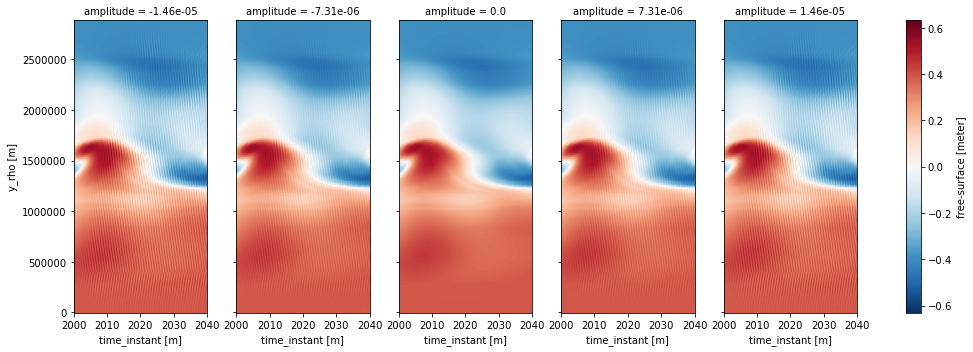

In [22]:
ds.plot(x='time', y='y_rho', 
        col='amplitude', col_wrap=5,
        figsize=(15,5), xlim=(2000,2040))

In [46]:
#cmap = 'RdGy'
#vmin, vmax =-.1,.1
pkw = {'vmin': -.1, 'vmax': .1, 'cmap': 'RdGy', 'xlim': (2000,2030), 'figsize': (20,5)}

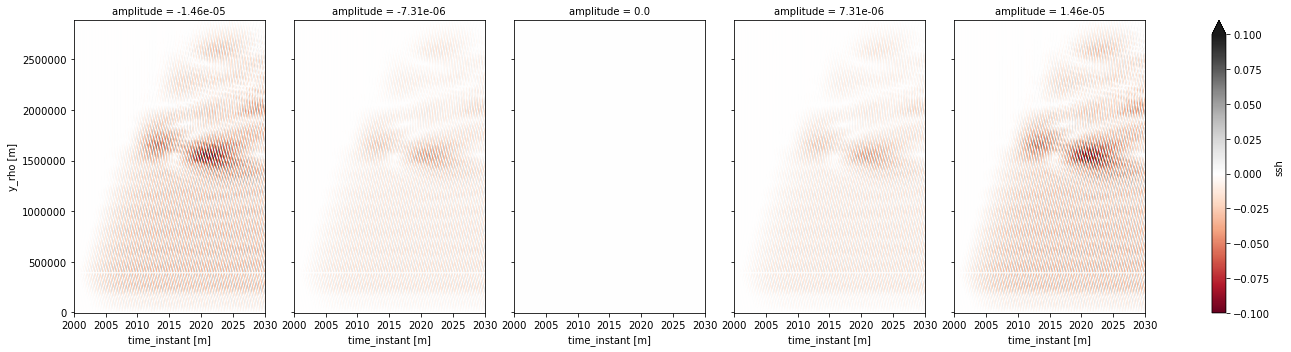

In [47]:
(ds-ds.sel(amplitude=0.)).plot(x='time', y='y_rho', 
                               col='amplitude', col_wrap=5,
                               **pkw)

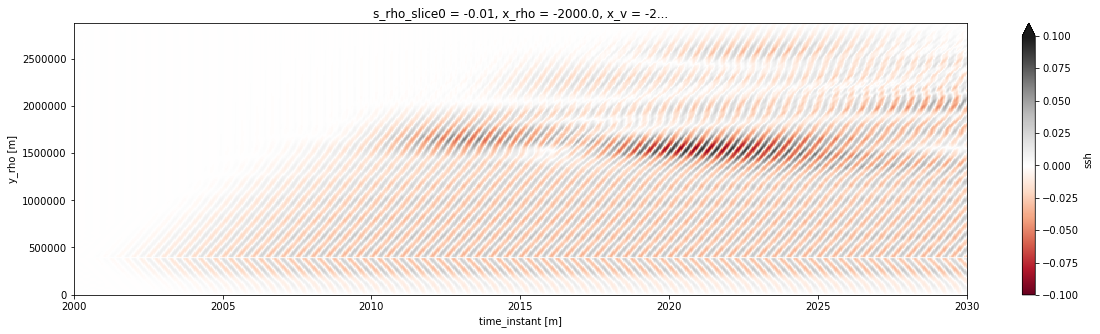

In [36]:
((ds.isel(amplitude=0)-ds.sel(amplitude=0.))
    .plot(x='time', y='y_rho', **pkw)
)

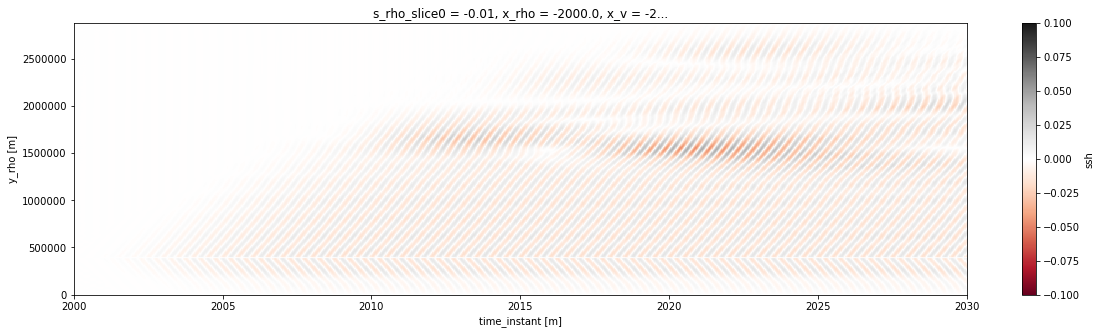

In [38]:
((ds.isel(amplitude=1)-ds.sel(amplitude=0.))
  .plot(x='time', y='y_rho', **pkw)
)

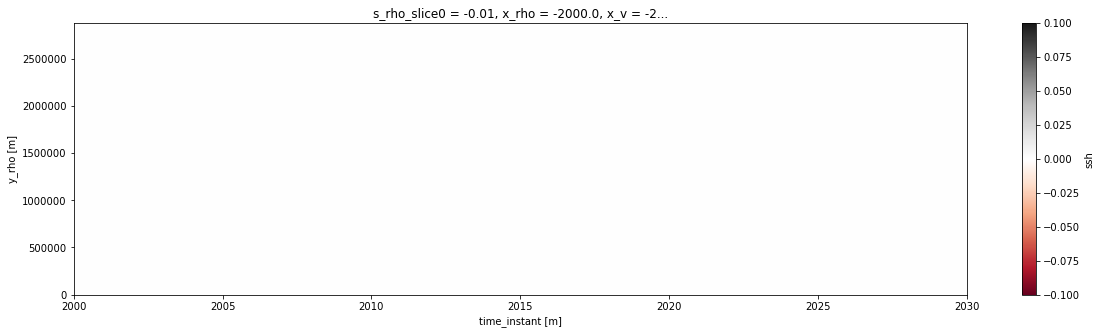

In [39]:
((ds.isel(amplitude=2)-ds.sel(amplitude=0.))
  .plot(x='time', y='y_rho', **pkw)
)

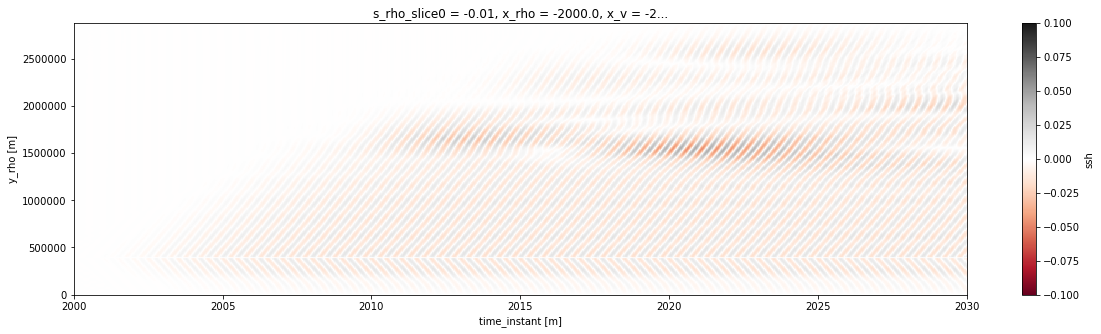

In [40]:
((ds.isel(amplitude=3)-ds.sel(amplitude=0.))
  .plot(x='time', y='y_rho', **pkw)
)

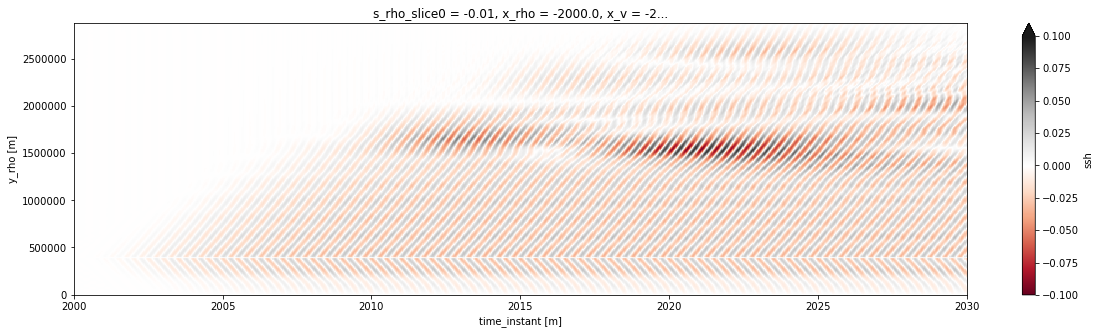

In [41]:
((ds.isel(amplitude=4)-ds.sel(amplitude=0.))
  .plot(x='time', y='y_rho', **pkw)
)

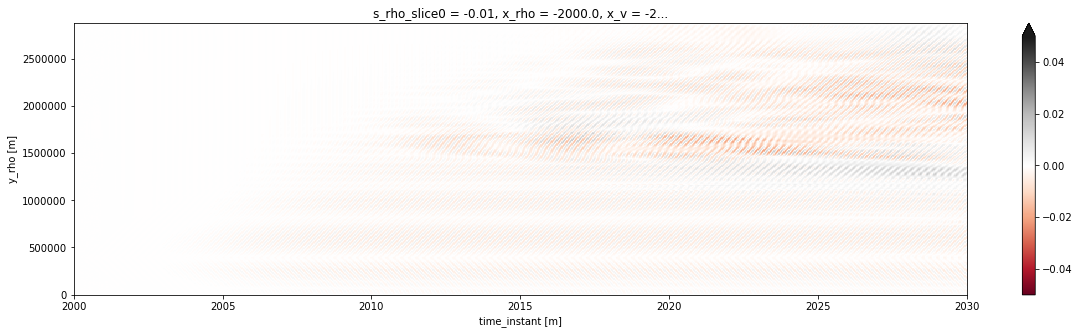

In [48]:
i=4

dds = ds-ds.sel(amplitude=0.)

pkw.update({'vmin': -.05, 'vmax': .05})

((dds-dds.isel(amplitude=i)*ds.amplitude/ds.amplitude[i])
 .isel(amplitude=0)
 .plot(x='time', y='y_rho', **pkw)
)

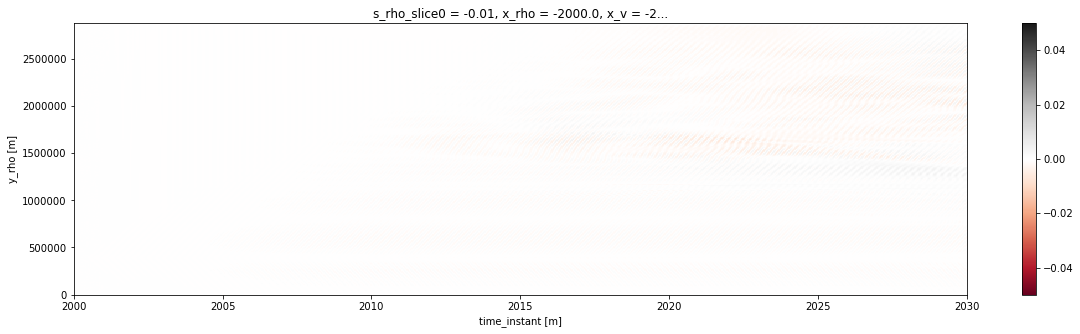

In [51]:
i=3

dds = ds-ds.sel(amplitude=0.)

((dds-dds.isel(amplitude=i)*ds.amplitude/ds.amplitude[i])
 .isel(amplitude=1)
 .plot(x='time', y='y_rho', **pkw)
)

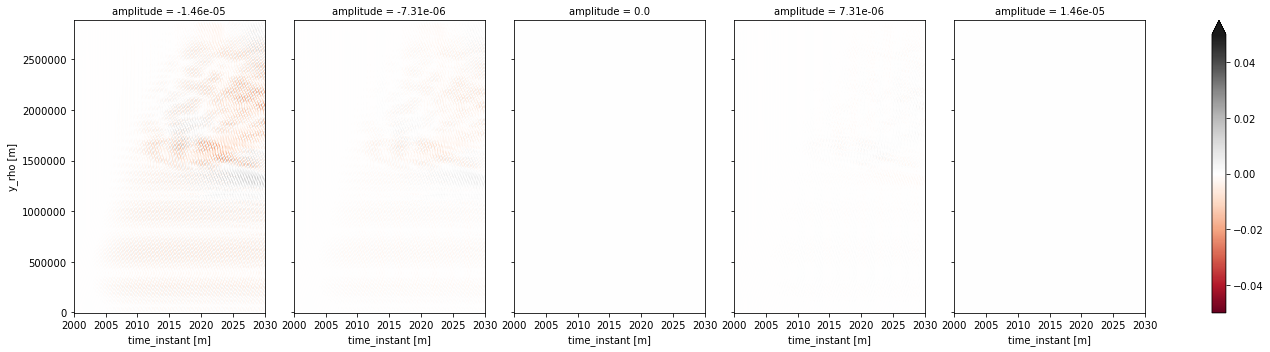

In [50]:
i=4

dds = ds-ds.sel(amplitude=0.)

((dds-dds.isel(amplitude=i)*ds.amplitude/ds.amplitude[i])
    .plot(x='time', y='y_rho', 
          col='amplitude', col_wrap=5, **pkw)
)